In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()

In [6]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

calculating_one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > calculating_one_year).\
    order_by(Measurement.date).all()

# Want the date that is one year from the recent date
precipitation_data[0]

('2016-08-24', 0.08)

In [12]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

precipitation_data_df = pd.DataFrame(precipitation_data)
precipitation_data_df.set_index('date')
precipitation_data_df.sort_values(['date'], ascending=True)

# Dropping null values
precipitation_data_df.dropna(how='any')

# Renameing the prcp columns to Prcp Inches for the graph
precipitation_data_df = precipitation_data_df.rename(columns={'prcp':'Prcp Inches'})

precipitation_data_df.head()

,date,Prcp Inches
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


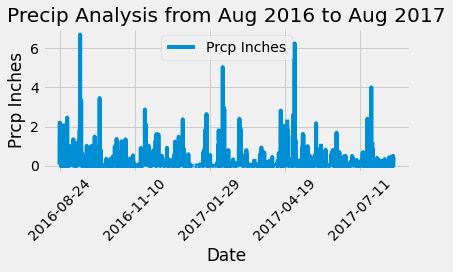

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_data_df.plot('date','Prcp Inches', rot=45)
plt.title("Precip Analysis from Aug 2016 to Aug 2017")
plt.xlabel("Date")
plt.ylabel("Prcp Inches")
plt.savefig('Images/Precipitation_Analysis.png')
plt.tight_layout()
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_data_df.describe()

,Prcp Inches
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset

total_number_stations = session.query(Station.id).count()
print(total_number_stations)

9


In [22]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

stations_active = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

for s, o in stations_active:
    print(f"The station {s} had {o} observations.")

The station USC00519281 had 2772 observations.
The station USC00519397 had 2724 observations.
The station USC00513117 had 2709 observations.
The station USC00519523 had 2669 observations.
The station USC00516128 had 2612 observations.
The station USC00514830 had 2202 observations.
The station USC00511918 had 1979 observations.
The station USC00517948 had 1372 observations.
The station USC00518838 had 511 observations.


In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = 'USC00519281'

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
              filter(Measurement.station == most_active_station_id).all()

[(54.0, 85.0, 71.66378066378067)]

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

previous_year_TOBS = session.query(Measurement.date, Measurement.tobs).\
            filter(Measurement.station == most_active_station_id).\
            filter(Measurement.date > calculating_one_year).\
            order_by(Measurement.date).all()
temp_data_df = pd.DataFrame(previous_year_TOBS)

temp_data_df

,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


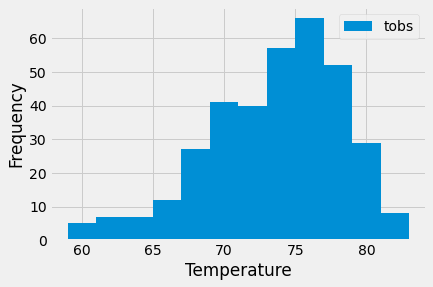

In [29]:
# Plotting Histogram
temp_data_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.savefig('Images/Station_Analysis.png')
plt.show()

# Close session

In [30]:
# Close Session
session.close()